In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [81]:
dfx=pd.read_csv('/Users/kaushikchaturvedula/python/chemical/Logistic_X_Train.csv')
dfy=pd.read_csv('/Users/kaushikchaturvedula/python/chemical/Logistic_Y_Train.csv')
x_train=dfx.values
y_train=dfy.values
x_train.reshape((-1,))
y_train=np.array([int(i) for i in list(y_train)])
x_train,y_train

(array([[-1.23937466,  0.74910149, -0.52851491],
        [-1.03607028,  0.80143631, -1.28371152],
        [-0.61557914,  1.57952053, -1.39192706],
        ...,
        [ 0.08827657,  1.63878904, -2.19364056],
        [ 1.52515501,  0.85923429,  1.50530791],
        [-0.97981744,  0.56395376, -1.53939416]]),
 array([1, 1, 1, ..., 1, 0, 1]))

In [82]:
cls0=[]
cls1=[]
i=0
while(i<len(y_train)):
    if y_train[i]==0:
        cls0.append(list(x_train[i]))
    else:
        cls1.append(list(x_train[i]))
    i+=1
cls0_f1=[x[0] for x in cls0]
cls0_f2=[x[1] for x in cls0]
cls0_f3=[x[2] for x in cls0]
cls1_f1=[x[0] for x in cls1]
cls1_f2=[x[1] for x in cls1]
cls1_f3=[x[2] for x in cls1]
cls0_f1=np.array(cls0_f1)
cls0_f2=np.array(cls0_f2)
cls0_f3=np.array(cls0_f3)
cls1_f1=np.array(cls1_f1)
cls1_f2=np.array(cls1_f2)
cls1_f3=np.array(cls1_f3)
cls0=np.array(cls0)
cls1=np.array(cls1)

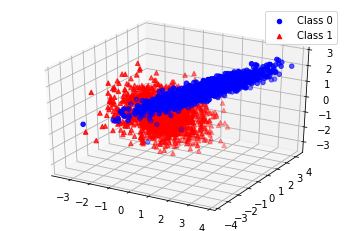

In [83]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.scatter(cls0_f1,cls0_f2,cls0_f3,color='blue',label='Class 0')
axes.scatter(cls1_f1,cls1_f2,cls1_f3,color='red',marker='^',label='Class 1')
axes.legend()
plt.show()

In [84]:
def hypothesis(x,w,b):
    hx = np.dot(x,w) + b
    return sigmoid(hx)

In [85]:
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [86]:
def error(x,y,w,b):
    
    err = 0.0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], w, b)
        err += y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx)

    return err

In [87]:
def get_grad(x,y,w,b):
    
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], w, b)
        grad_b += (y[i]-hx)
        grad_w += (y[i]-hx)*x[i]
    
    return [grad_w, grad_b]

In [148]:
def gradient_ascent(x,y,w,b,learning_rate=0.0001):
    err = error(x,y,w,b)
    [grad_w,grad_b] = get_grad(x,y,w,b)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err, w, b

In [ ]:
w = 2*np.random.random((x_train.shape[1],))
print(W)
b = 5*np.random.random()
loss = []
for i in range(1000):
    l, wset, bset = gradient_ascent(x_train, y_train, w, b, learning_rate=0.0001)
    loss.append(l)

In [ ]:
plt.plot(loss)
plt.show()

In [ ]:
print(wset)
print(bset)

In [ ]:
x_test=pd.read_csv('/Users/kaushikchaturvedula/python/chemical/Logistic_X_Test.csv')
x_test=x_test.values

In [ ]:
y_test=hypothesis(x_test,wset,bset)

In [94]:
y_test

array([1.00000000e+00, 8.77224776e-03, 1.65127579e-40, 9.75604000e-01,
       9.99948897e-01, 1.00000000e+00, 1.98946400e-35, 9.99931936e-01,
       1.74330547e-45, 1.92176392e-31, 5.78663475e-26, 9.99999999e-01,
       1.00000000e+00, 6.32347686e-02, 2.64915008e-18, 4.12525754e-24,
       9.25118917e-01, 4.47276800e-27, 4.34234444e-12, 5.22236243e-09,
       5.55009665e-03, 4.79902521e-15, 1.00000000e+00, 7.99823600e-24,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.49635266e-33,
       1.01660835e-48, 1.40532553e-06, 1.00000000e+00, 1.00000000e+00,
       9.99999996e-01, 3.23865141e-41, 3.47639533e-46, 1.02562499e-31,
       1.00000000e+00, 5.21020273e-05, 3.10784748e-38, 1.88550380e-11,
       1.00000000e+00, 5.91372171e-09, 1.69931853e-10, 8.28652010e-18,
       1.52447951e-01, 9.99960472e-01, 1.14812979e-11, 5.41788059e-05,
       1.80223811e-33, 4.23244573e-07, 2.40493691e-04, 9.60156865e-04,
       4.32173397e-02, 1.00000000e+00, 1.12875225e-08, 7.84470078e-11,
      